In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2 = pd.read_csv('/content/drive/MyDrive/Data Analyst/Datasets/houses_to_rent_v2.csv')

#Análise Exploratória

Análise dos dados bruto com a finalidade de identificar alguns erros e padrões antes das análises.

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [4]:
#Temos 358 registros que são duplicados e que iremos tratar na etapa de data cleaning
df2.duplicated().sum()

358

In [5]:
#Apagando as ocorrências duplicadas e garantidno que a ação foi executada
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10334 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10334 non-null  object
 1   area                 10334 non-null  int64 
 2   rooms                10334 non-null  int64 
 3   bathroom             10334 non-null  int64 
 4   parking spaces       10334 non-null  int64 
 5   floor                10334 non-null  object
 6   animal               10334 non-null  object
 7   furniture            10334 non-null  object
 8   hoa (R$)             10334 non-null  int64 
 9   rent amount (R$)     10334 non-null  int64 
 10  property tax (R$)    10334 non-null  int64 
 11  fire insurance (R$)  10334 non-null  int64 
 12  total (R$)           10334 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [6]:
#Normalização dos nomes da coluna para facilitar a análise
df2.rename(columns={"parking spaces" : "parking_spaces" , "hoa (R$)" : "hoa", "rent amount (R$)" : "rent_amount" , "property tax (R$)" : "property_tax" ,
                    "fire insurance (R$)" : "fire_insurance" , "total (R$)" : "total"}, inplace=True)
df2.rename(columns={"animal" : "accepts_pets" , "furniture" : "furnished"}, inplace=True)

In [7]:
#Tranformação do tipo da coluna "accepts_pets" de object para boolean para facilitar operações lógicas e filtros"
df2['accepts_pets'] = df2['accepts_pets'].map({'acept': True, 'not acept': False})

In [8]:
#Tranformação do tipo da coluna "furnished" de object para boolean para facilitar operações lógicas e filtros"
df2['furnished'] = df2['furnished'].map({'furnished': True, 'not furnished': False})

In [9]:
#Identificamos os valores únicos para os andares.
df2['floor'].unique()


array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [10]:
#Para existir um padrão, trocamos o "-" que significa térreo, para "0"
df2['floor'] = df2['floor'].replace("-" , 0)
df2['floor'].unique()

array(['7', '20', '6', '2', '1', 0, '4', '3', '10', '11', '24', '9', '8',
       '17', '18', '5', '13', '15', '16', '14', '26', '12', '21', '19',
       '22', '27', '23', '35', '25', '46', '28', '29', '301', '51', '32'],
      dtype=object)

In [11]:
# Overview dos dados
df2.describe()

,area,rooms,bathroom,parking_spaces,hoa,rent_amount,property_tax,fire_insurance,total
count,10334.000000,10334.000000,10334.000000,10334.000000,1.033400e+04,10334.000000,10334.000000,10334.000000,1.033400e+04
mean,152.439423,2.539965,2.268725,1.644475,1.091244e+03,3966.296013,376.929263,54.264273,5.488943e+03
std,545.875595,1.168185,1.414650,1.598527,1.144609e+04,3436.190007,3160.602165,48.164380,1.266911e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,59.000000,2.000000,1.000000,1.000000,1.800000e+02,1598.250000,41.000000,21.000000,2.116000e+03
50%,95.000000,3.000000,2.000000,1.000000,5.710000e+02,2750.000000,130.000000,37.000000,3.685500e+03
75%,190.000000,3.000000,3.000000,2.000000,1.286750e+03,5000.000000,389.750000,70.000000,6.912000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [12]:
# Não temos a ocorrência de valores nulos no dataset
df2.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking_spaces    0
floor             0
accepts_pets      0
furnished         0
hoa               0
rent_amount       0
property_tax      0
fire_insurance    0
total             0
dtype: int64

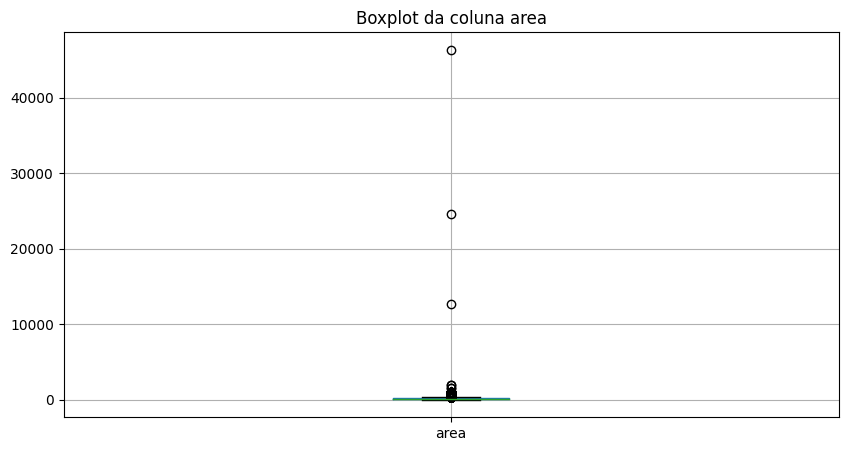

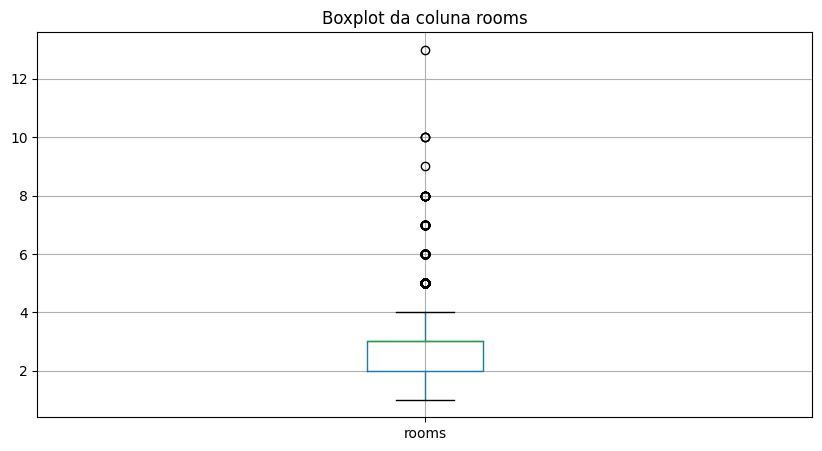

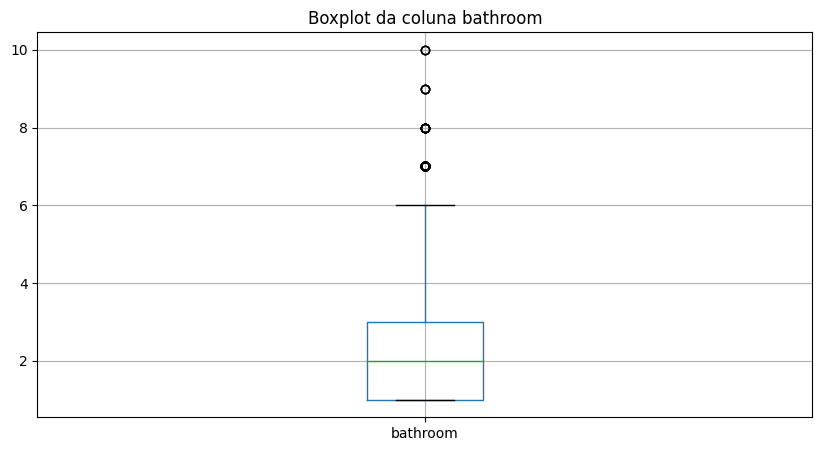

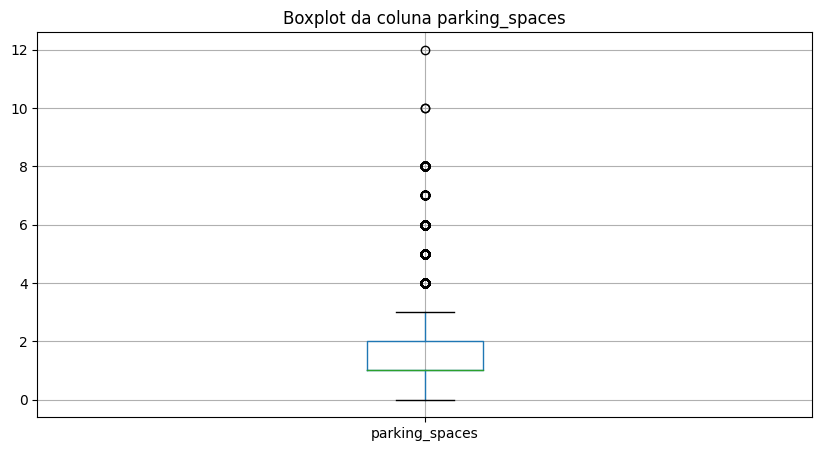

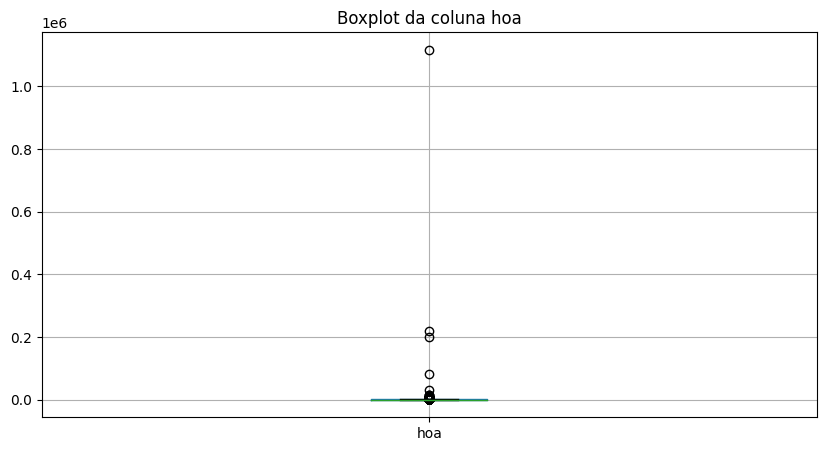

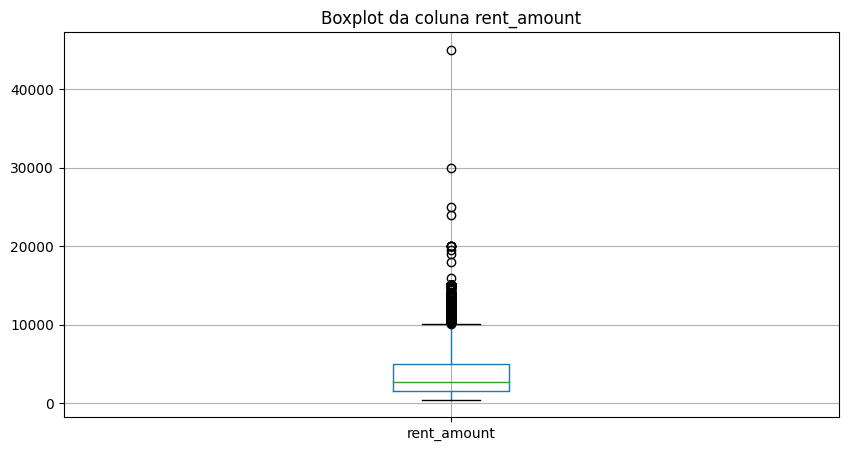

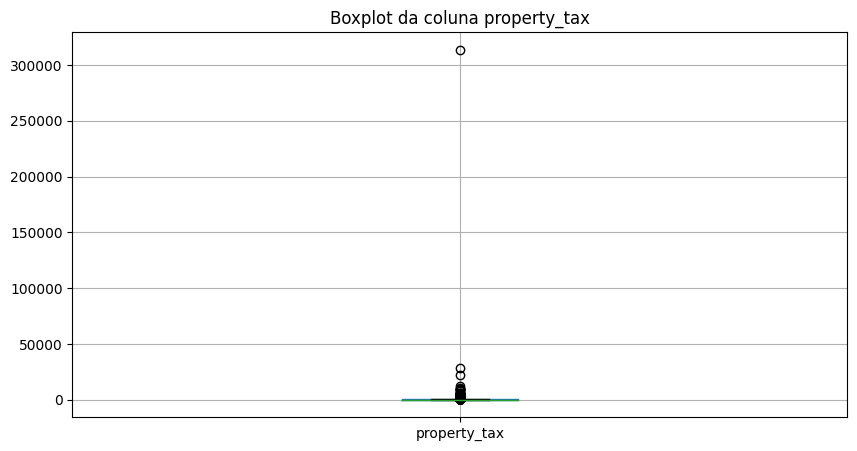

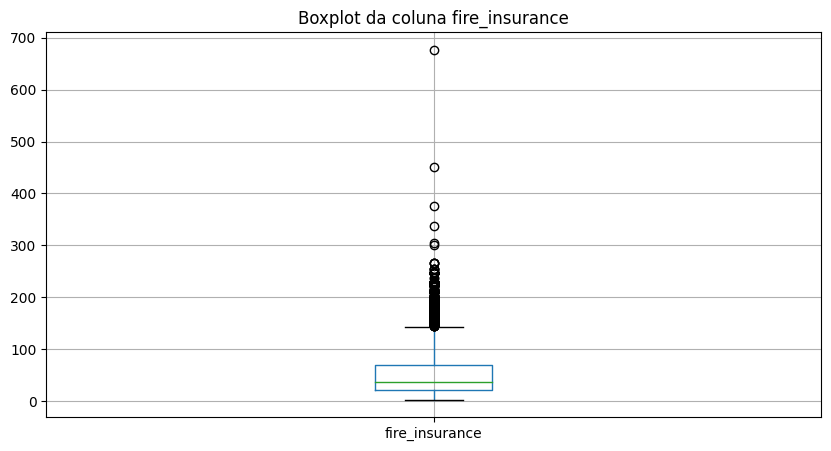

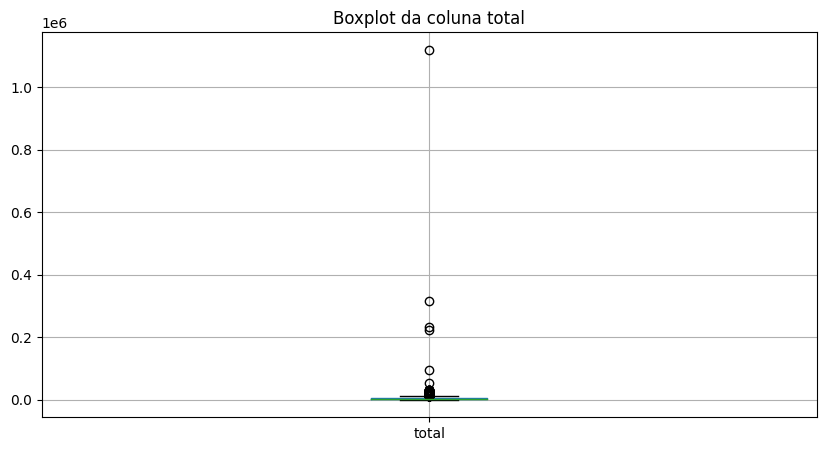

In [13]:
#Identificando os outliers dentro do dataset antes da etapa de data cleaning
column_outliers = ["area" , "rooms" , "bathroom" , "parking_spaces" , "hoa" , "rent_amount", "property_tax", "fire_insurance", "total"]
for coluna in column_outliers:
  plt.figure(figsize=(10,5))
  df2.boxplot(column=coluna)
  plt.title(f'Boxplot da coluna {coluna}')
  plt.show()

#General Data Analysis
A ideia aqui é fazer uma análise geral dos dados já tratados para termos um panorama geral do que os da dos querem nos dizer.

## Análise por cidade

In [14]:
#Número de imóveis por cidade
city_analysis = df2['city'].value_counts()
city_analysis

São Paulo         5717
Rio de Janeiro    1431
Belo Horizonte    1209
Porto Alegre      1154
Campinas           823
Name: city, dtype: int64

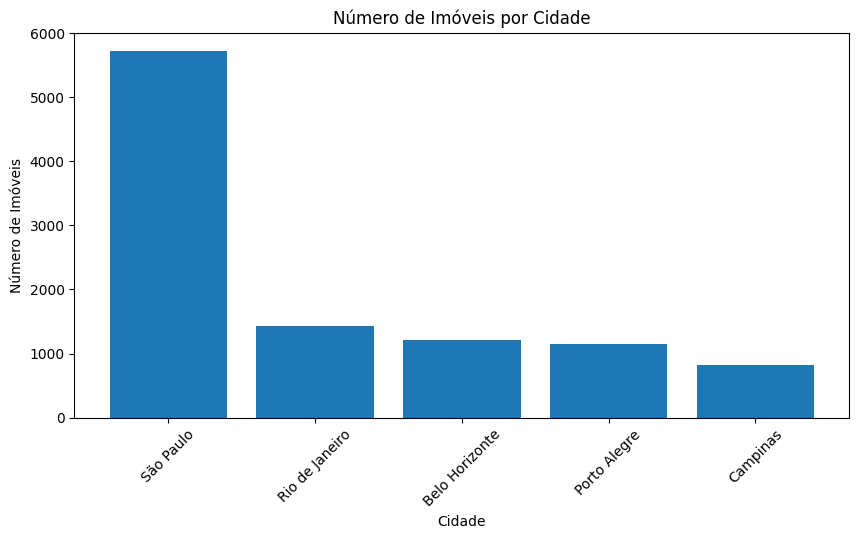

In [15]:
plt.figure(figsize=(10,5))
plt.bar(city_analysis.index , city_analysis.values)
plt.xticks(rotation=45)
plt.xlabel('Cidade')
plt.ylabel('Número de Imóveis')
plt.title('Número de Imóveis por Cidade')
plt.show()

###Insight

Podemos notar que a cidade de São Paulo se destaca das demais e é a cidade que mais tem imóveis para serem alugados.

## Área média por cidade e total médio por cidade

In [16]:
df2[['city' , 'area' , 'total']].groupby('city').mean('area', 'total').sort_values(by = 'area' , ascending=False)

,area,total
city,,
Belo Horizonte,212.933002,5563.485525
São Paulo,162.163023,6485.731328
Campinas,140.003645,3215.088700
Rio de Janeiro,107.562544,4750.878407
Porto Alegre,105.409012,3009.564125


## Análise por imóvel mobíliado ou não

In [17]:
furnished_analysis = df2['furnished'].value_counts()
furnished_analysis
color = ['orange' , 'blue']

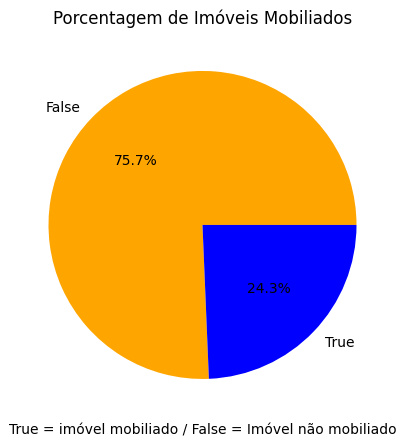

In [18]:
plt.figure(figsize=(10,5))
plt.pie(furnished_analysis, labels=furnished_analysis.index, autopct='%1.1f%%', colors = color)
plt.xticks(rotation=45)
plt.xlabel('True = imóvel mobiliado / False = Imóvel não mobiliado')
plt.title('Porcentagem de Imóveis Mobiliados')
plt.show()

###Insight

Podemos notar que em nosso portfólio de imóveis, existem muito mais imóveis sem mobília.

## Análise de imóvel aceita ou não pets

In [19]:
pet_analysis = df2['accepts_pets'].value_counts()
color = ['blue', 'orange']

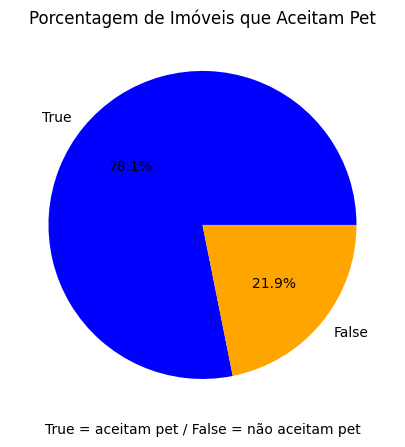

In [20]:
plt.figure(figsize=(10,5))
plt.pie(pet_analysis, labels=pet_analysis.index, autopct='%1.1f%%', colors=color)
plt.xticks(rotation=45)
plt.xlabel('True = aceitam pet / False = não aceitam pet')
plt.title('Porcentagem de Imóveis que Aceitam Pet')
plt.show()

### Insight

Existem mais imóveis que aceitam pet.

## Valor de M²

In [21]:
#Adicionamos esta coluna para podermos entender se existe alguma cidade mais valorizada que a outra.
df2['m2_price'] = df2['total'] / df2['area']

In [22]:
mean_m2_price = df2[['city' , 'm2_price']].groupby('city').m2_price.mean().sort_values(ascending=False)
mean_m2_price

city
Rio de Janeiro    51.374775
São Paulo         51.072172
Belo Horizonte    36.279809
Porto Alegre      33.005775
Campinas          29.342917
Name: m2_price, dtype: float64

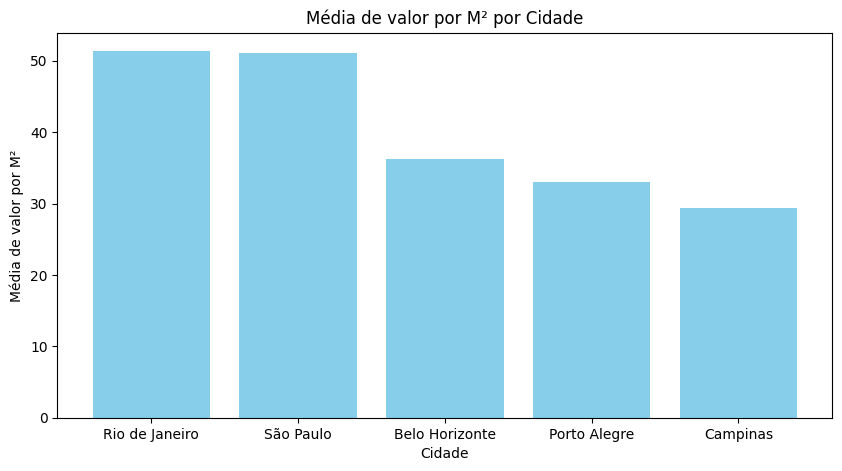

In [23]:
plt.figure(figsize=(10,5))
plt.bar(mean_m2_price.index , mean_m2_price.values, color='skyblue')
plt.xlabel('Cidade')
plt.ylabel('Média de valor por M²')
plt.title('Média de valor por M² por Cidade')
plt.show()

###Insights
As cidades do Rio de Janeiro e São Paulo são as com maior valor de m². O que pode sinalizar que, na média, o preço dos alugueis nesses lugares são significativamente mais altos.

##Análise por cidade: São Paulo (desconsiderando outliers)

In [24]:
spdf_area = df2.query("city == 'São Paulo' and area < 400")

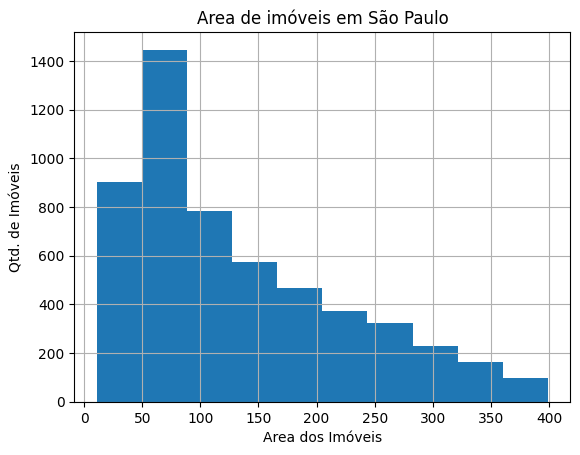

In [25]:
spdf_area.hist(column='area' , bins=10)
plt.xlabel('Area dos Imóveis')
plt.ylabel('Qtd. de Imóveis')
plt.title('Area de imóveis em São Paulo')
plt.show()

###Insight

Em São Paulo, a maioria dos imóveis do nosso portfólio têm entre 10 e 120 de area.

In [26]:
spdf_total = df2.query('city == "São Paulo" and total < 15000')

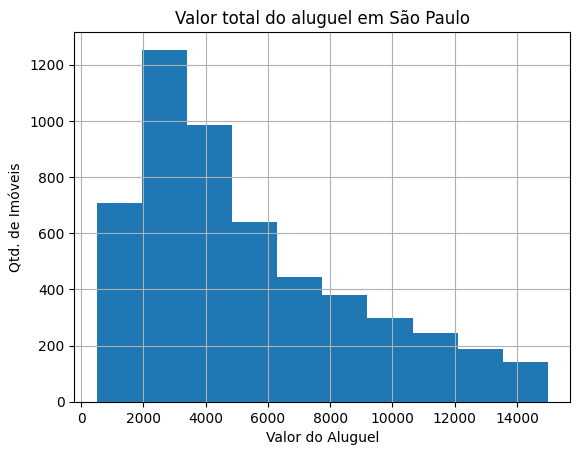

In [27]:
spdf_total.hist(column='total' , bins=10)
plt.xlabel('Valor do Aluguel')
plt.ylabel('Qtd. de Imóveis')
plt.title('Valor total do aluguel em São Paulo')
plt.show()

###Insights
Em São Paulo, os valores do aluguel estão concentrados entre 2000 e 4300

#Análise por cidade: Belo Horizonte (desconsiderando outliers)

In [28]:
bhdf_area = df2.query('city == "Belo Horizonte" and area < 400')

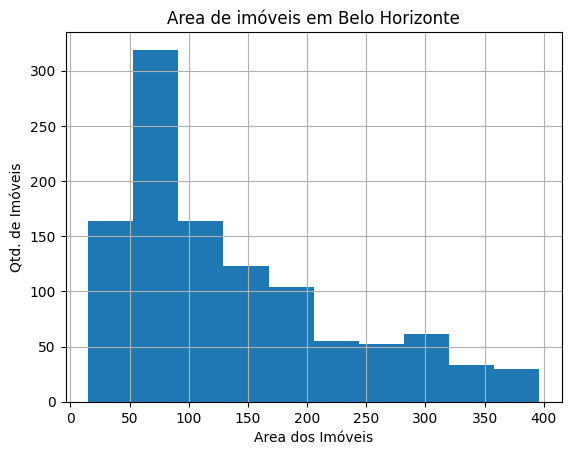

In [29]:
bhdf_area.hist(column='area' , bins=10)
plt.xlabel('Area dos Imóveis')
plt.ylabel('Qtd. de Imóveis')
plt.title('Area de imóveis em Belo Horizonte')
plt.show()

###Insights

Em Belo Horizonte, os imóveis têm em sua maioria area entre 20 e 150

In [30]:
bhdf_total = df2.query('city == "Belo Horizonte" and total < 8000')

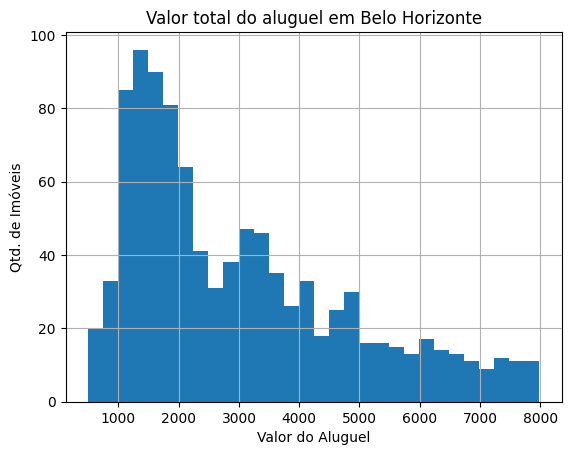

In [31]:
bhdf_total.hist(column='total' , bins=30)
plt.xlabel('Valor do Aluguel')
plt.ylabel('Qtd. de Imóveis')
plt.title('Valor total do aluguel em Belo Horizonte')
plt.show()

###Insights

E o valor total de aluguel em Belo Horizonte está entre 1000 e 2100.

#Análise por cidade: Porto Alegre (desconsiderando outliers)

In [32]:
poa_area = df2.query('city == "Porto Alegre" and area < 130')

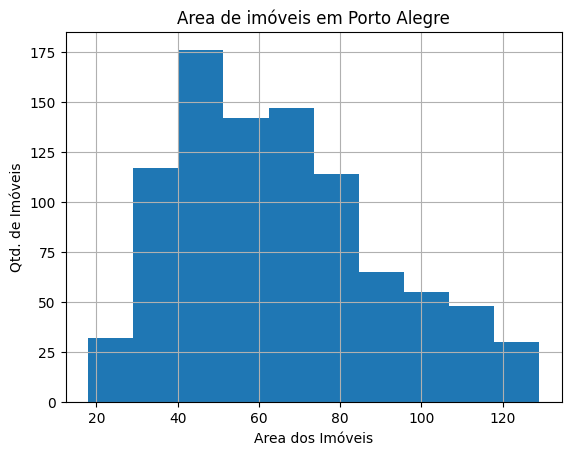

In [33]:
poa_area.hist(column='area' , bins=10)
plt.xlabel('Area dos Imóveis')
plt.ylabel('Qtd. de Imóveis')
plt.title('Area de imóveis em Porto Alegre')
plt.show()

### Insights

Em Porto Alegre, temos em nosso portfólio uma maior concentração de imóveis com area entre 40 a 80.

In [34]:
poa_total = df2.query('city == "Porto Alegre" and total < 5000')

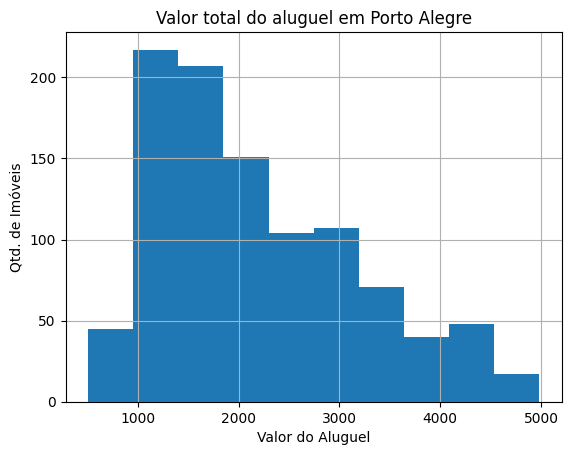

In [35]:
poa_total.hist(column='total' , bins=10)
plt.xlabel('Valor do Aluguel')
plt.ylabel('Qtd. de Imóveis')
plt.title('Valor total do aluguel em Porto Alegre')
plt.show()

###Insights

Mas quando o assunto é valores totais, Porto Alegre tem uma maior concentração de imóveis com total entre 900 e 2200.

#Análise por cidade: Rio de Janeiro (desconsiderando outliers)

In [36]:
rj_area = df2.query('city == "Rio de Janeiro" and area < 180')


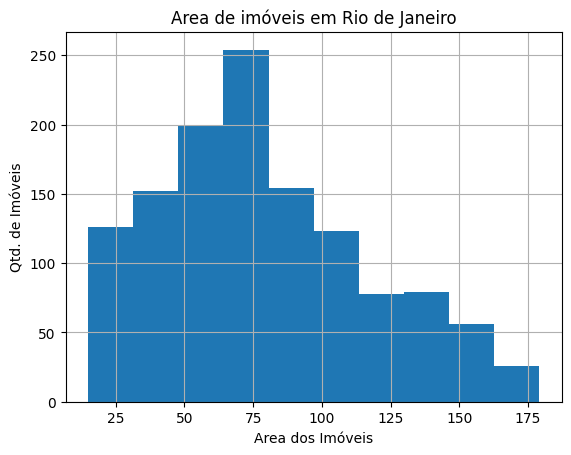

In [37]:
rj_area.hist(column='area' , bins=10)
plt.xlabel('Area dos Imóveis')
plt.ylabel('Qtd. de Imóveis')
plt.title('Area de imóveis em Rio de Janeiro')
plt.show()

###Insights

No Rio de Janeiro temos mais imóveis com uma area entre 50 e 80.

In [38]:
rj_total = df2.query('city == "Rio de Janeiro" and total < 8500')

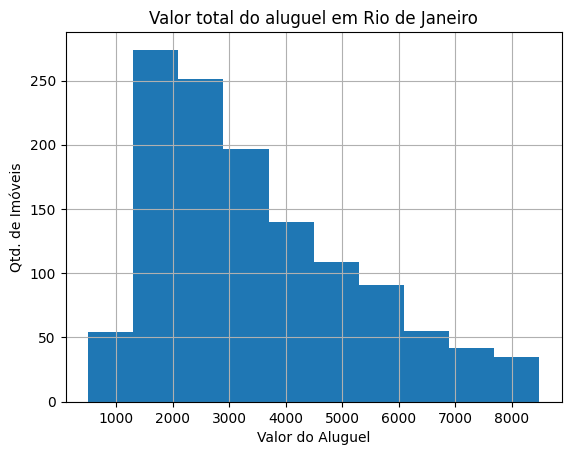

In [39]:
rj_total.hist(column='total' , bins=10)
plt.xlabel('Valor do Aluguel')
plt.ylabel('Qtd. de Imóveis')
plt.title('Valor total do aluguel em Rio de Janeiro')
plt.show()

###Insights

Em valores totais, o Rio de Janeiro tem imoveis na faixa de valores entre 1500 a 3700.

#Análise por cidade: Campinas (desconsiderando outliers)

In [40]:
camp_area = df2.query('city == "Campinas" and area < 120')

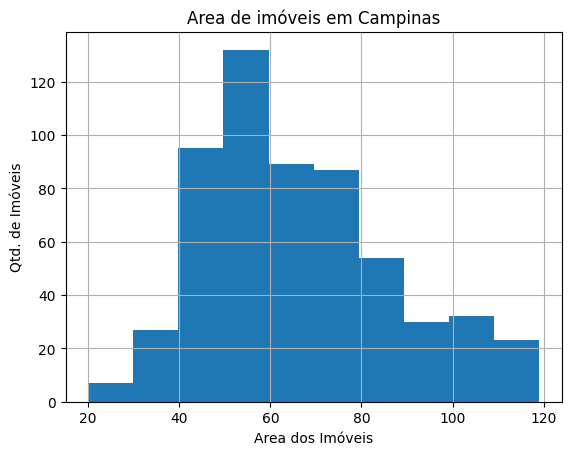

In [41]:
camp_area.hist(column='area' , bins=10)
plt.xlabel('Area dos Imóveis')
plt.ylabel('Qtd. de Imóveis')
plt.title('Area de imóveis em Campinas')
plt.show()

###Insights

Em Campinas nós temos maior número de imóveis com area entre 40 e 80.

In [42]:
camp_total = df2.query('city == "Campinas" and total < 5500')

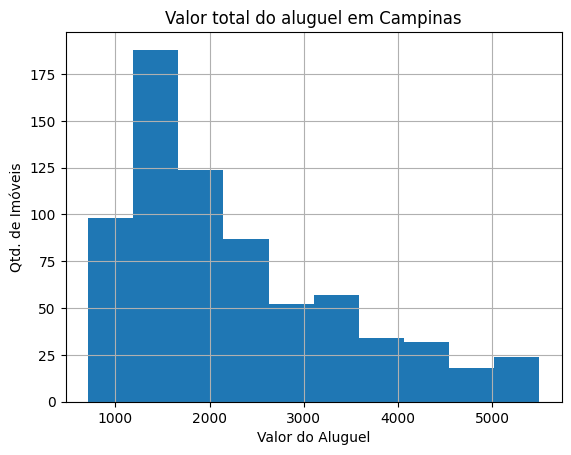

In [43]:
camp_total.hist(column='total' , bins=10)
plt.xlabel('Valor do Aluguel')
plt.ylabel('Qtd. de Imóveis')
plt.title('Valor total do aluguel em Campinas')
plt.show()

###Insights

E entre 1200  e 2100 os valores totais de aluguel em Campinas

##General Insights

* **Belo Horizont**e e **Porto Alegr**e são as cidades onde temos mais concentração de imóveis maiores e com preço total mais baixo.

* Como vimos na análise de m², **São Paulo** é a cidade com maior valor total de aluguel. Sendo seguido pela cidade do **Rio de Janeiro.**

#Analise por grupos

## Baratos:
Os imóveis mais baratos de cada cidade.

In [44]:
city2 = ['São Paulo' , 'Belo Horizonte' , 'Rio de Janeiro' , 'Porto Alegre' , 'Campinas']
result1 = []

for cidade in city2:
  cidade_min = df2.query(f'city == "{cidade}"')
  min_total = cidade_min['total'].min()
  result = df2.query(f'city == "{cidade}" and total == {min_total}')
  result1.append(result)
  print(f'O valor mínimo de aluguel para a cidade de {cidade} é {min_total}')

print('---')
print('Os da dados gerais dos imóveis mais baratos')
print('---')
df_result = pd.concat(result1, ignore_index=True)
print(df_result.to_markdown(index=True))



O valor mínimo de aluguel para a cidade de São Paulo é 508
O valor mínimo de aluguel para a cidade de Belo Horizonte é 499
O valor mínimo de aluguel para a cidade de Rio de Janeiro é 507
O valor mínimo de aluguel para a cidade de Porto Alegre é 509
O valor mínimo de aluguel para a cidade de Campinas é 711
---
Os da dados gerais dos imóveis mais baratos
---
|    | city           |   area |   rooms |   bathroom |   parking_spaces |   floor | accepts_pets   | furnished   |   hoa |   rent_amount |   property_tax |   fire_insurance |   total |   m2_price |
|---:|:---------------|-------:|--------:|-----------:|-----------------:|--------:|:---------------|:------------|------:|--------------:|---------------:|-----------------:|--------:|-----------:|
|  0 | São Paulo      |     35 |       1 |          1 |                0 |       0 | False          | False       |     0 |           500 |              0 |                8 |     508 |    14.5143 |
|  1 | Belo Horizonte |     22 |       1 |  

###Insight

Ao analisarmos os imóveis mais baratos de cada cidade, podemos ver que eles não têm area maior que 42. Além disso, uma das taxas (hoa) está zerada na maioria dos imóveis, o que impacta no valor final do aluguel.

## Só entrar:
Imóveis já mobiliados

Nós temos em São Paulo, 1543 imóveis mobiliados
Nós temos em Belo Horizonte, 164 imóveis mobiliados
Nós temos em Rio de Janeiro, 403 imóveis mobiliados
Nós temos em Porto Alegre, 294 imóveis mobiliados
Nós temos em Campinas, 111 imóveis mobiliados


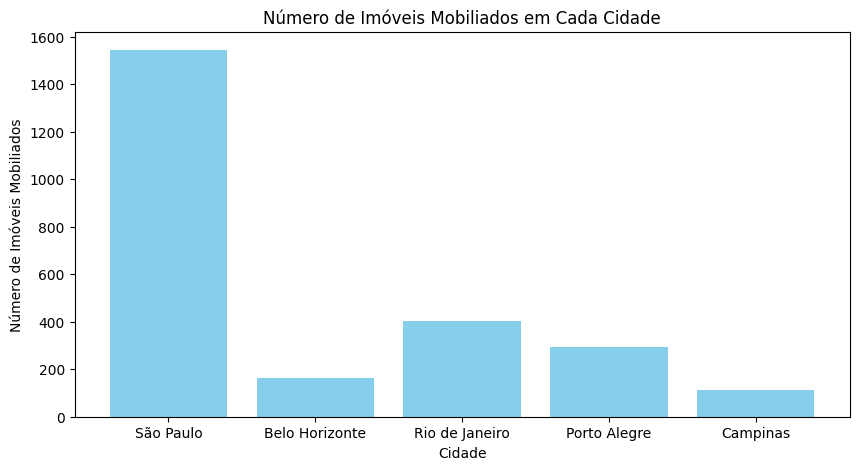

In [45]:
city2 = ['São Paulo' , 'Belo Horizonte' , 'Rio de Janeiro' , 'Porto Alegre' , 'Campinas']
count_total2 = []

for cidade in city2:
  fur = df2.query(f'city == "{cidade}" and furnished == True')
  fur_count = fur['furnished'].count()
  count_total2.append(fur_count)
  print(f'Nós temos em {cidade}, {fur_count} imóveis mobiliados')

plt.figure(figsize=(10, 5))
plt.bar(city2, count_total2, color='skyblue')
plt.xlabel('Cidade')
plt.ylabel('Número de Imóveis Mobiliados')
plt.title('Número de Imóveis Mobiliados em Cada Cidade')
plt.show()


###Insight

Podemos notar que São Paulo é a cidade com mais imóveis mobíliados.

## Gigantes:
Imóveis com uma àrea acima da média


A area média dos nossos imóveis em São Paulo é 162.16. E nós temos 2034 imóveis com area acima da média
A area média dos nossos imóveis em Belo Horizonte é 212.93. E nós temos 321 imóveis com area acima da média
A area média dos nossos imóveis em Rio de Janeiro é 107.56. E nós temos 458 imóveis com area acima da média
A area média dos nossos imóveis em Porto Alegre é 105.41. E nós temos 310 imóveis com area acima da média
A area média dos nossos imóveis em Campinas é 140.00. E nós temos 202 imóveis com area acima da média


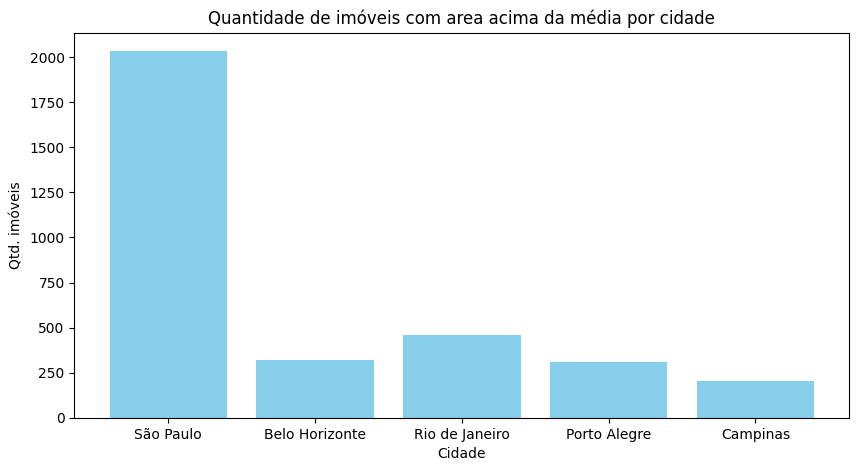

In [46]:
city2 = ['São Paulo' , 'Belo Horizonte' , 'Rio de Janeiro' , 'Porto Alegre' , 'Campinas']
count_total2 = []

for cidade in city2:
  cidade2 = df2.query(f'city == "{cidade}"')
  mean_city_area = cidade2['area'].mean()
  total = cidade2.query(f'area > {mean_city_area}')
  count_total = total['area'].count()
  count_total2.append(count_total)
  print(f'A area média dos nossos imóveis em {cidade} é {mean_city_area:.2f}. E nós temos {count_total} imóveis com area acima da média')

plt.figure(figsize=(10,5))
plt.bar(city2 , count_total2, color='skyblue')
plt.xlabel('Cidade')
plt.ylabel('Qtd. imóveis')
plt.title('Quantidade de imóveis com area acima da média por cidade')
plt.show()

#Pet Friendly
Imóveis que aceitam pets

Nós temos em São Paulo, 4375 imóveis que aceitam pet
Nós temos em Belo Horizonte, 900 imóveis que aceitam pet
Nós temos em Rio de Janeiro, 1146 imóveis que aceitam pet
Nós temos em Porto Alegre, 989 imóveis que aceitam pet
Nós temos em Campinas, 666 imóveis que aceitam pet


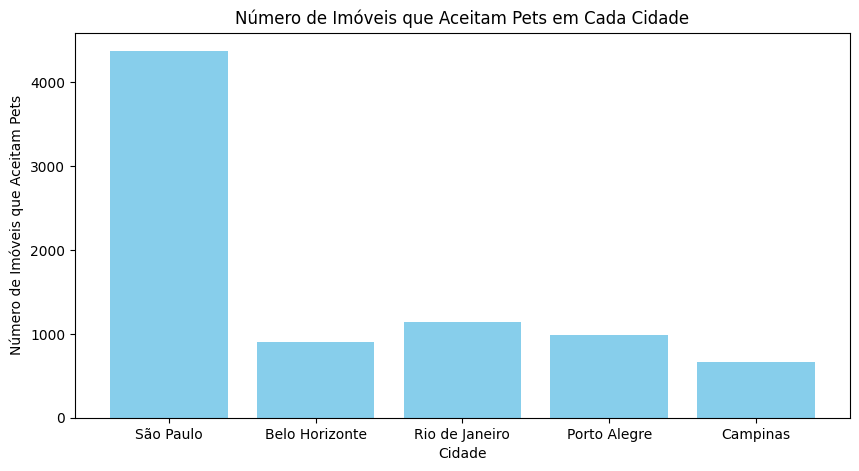

In [47]:
city2 = ['São Paulo' , 'Belo Horizonte' , 'Rio de Janeiro' , 'Porto Alegre' , 'Campinas']
pet_counts = []

for cidade in city2:
  pet = df2.query(f'city == "{cidade}" and accepts_pets == True')
  pet_count = pet['accepts_pets'].count()
  pet_counts.append(pet_count)
  print(f'Nós temos em {cidade}, {pet_count} imóveis que aceitam pet')

plt.figure(figsize=(10, 5))
plt.bar(city2, pet_counts, color='skyblue')
plt.xlabel('Cidade')
plt.ylabel('Número de Imóveis que Aceitam Pets')
plt.title('Número de Imóveis que Aceitam Pets em Cada Cidade')
plt.show()

#Correlações

<ipython-input-48-35bb904071a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df2.corr() , annot=True)


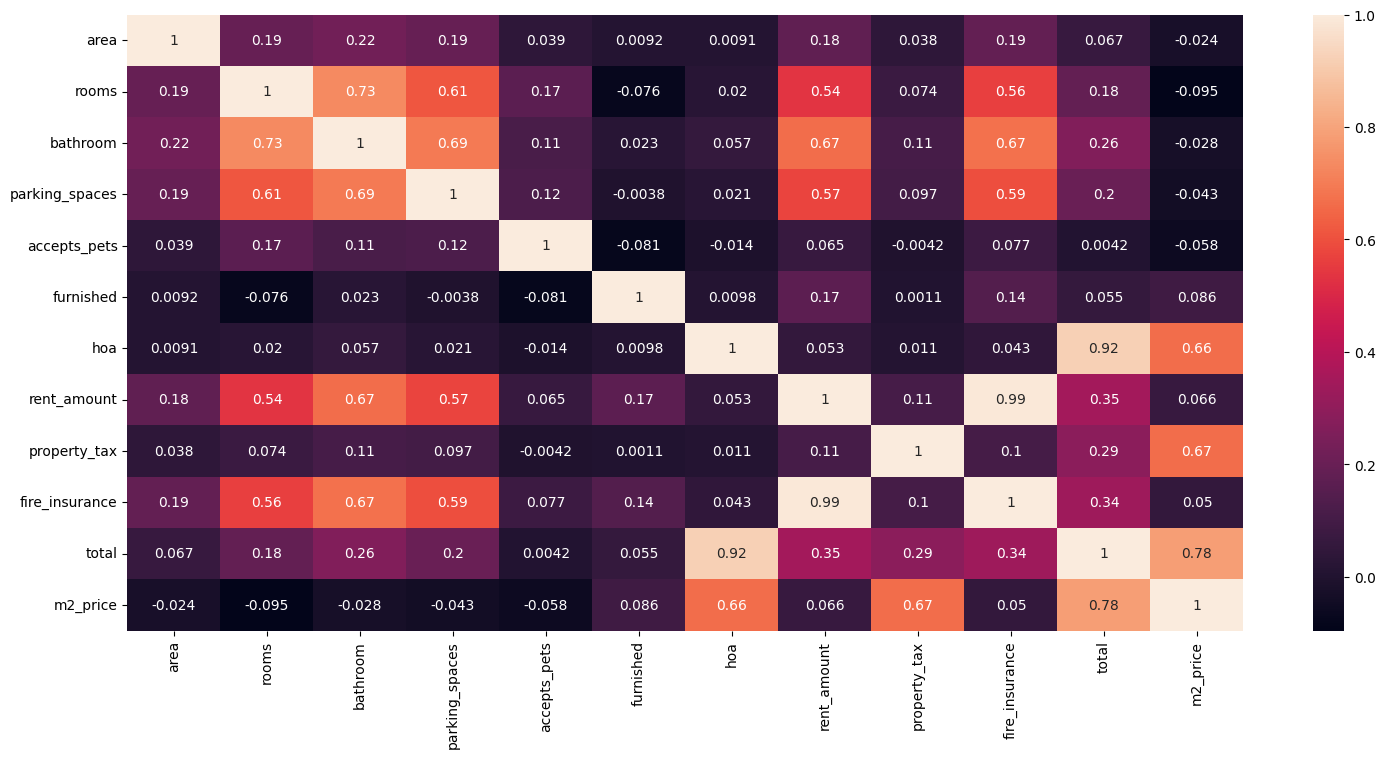

In [48]:
#Atráves do heatmap temos um panorama geral de como cada variável se relaciona com a outra (quanto mais claro, mais relação)
plt.rcParams['figure.figsize'] = (18,8)
ax = sns.heatmap(df2.corr() , annot=True)

## Correlações gerais de destaque
Ao criamos o heatmap, notamos que duas relações são bem fortes:

* Hoa com total
* Fire insurance com rent_amount
* total com m2_price

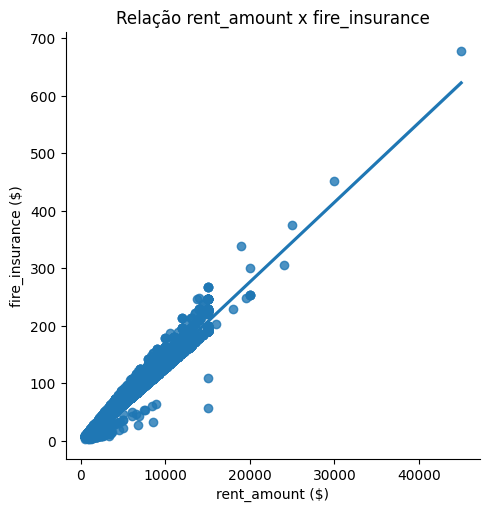

In [49]:
sns.lmplot(x = 'rent_amount' , y= 'fire_insurance', data = df2)
plt.xlabel('rent_amount ($)')
plt.ylabel('fire_insurance ($)')
plt.title('Relação rent_amount x fire_insurance')
plt.show()

###Insights

Podemos dizer que imóveis com um valor de aluguel mais elevado, consequentemente têm um seguro contra incêndio mais alto. Isso pode sinalizar que, caso haja um incêndio, o prejuízo pode ser maior caso não tenha seguro.

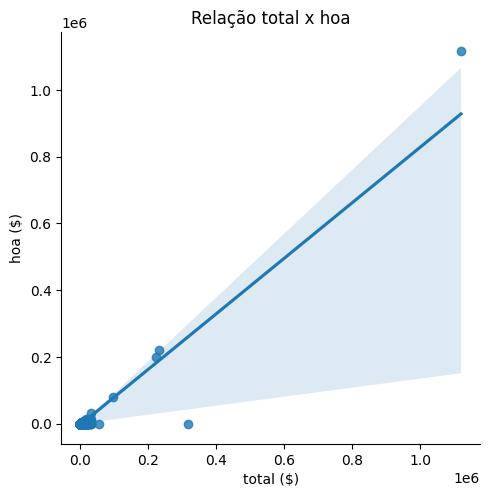

In [50]:
sns.lmplot(x = 'total' , y= 'hoa', data = df2)
plt.xlabel('total ($)')
plt.ylabel('hoa ($)')
plt.title('Relação total x hoa')
plt.show()

###Insights

* *HOA: se refere a uma associação de moradores. Essas associações geralmente são formadas por proprietários de imóveis em uma determinada área e têm o objetivo de estabelecer e aplicar regras para manter a estética e a qualidade da comunidade.*

Partindo dessa definição, podemos sugerir que, por mais que muitos imóveis do nosso portfólio não tenham essa taxa. Ela tem um impacto significativo no valor total de locação, ou seja, uma realação.

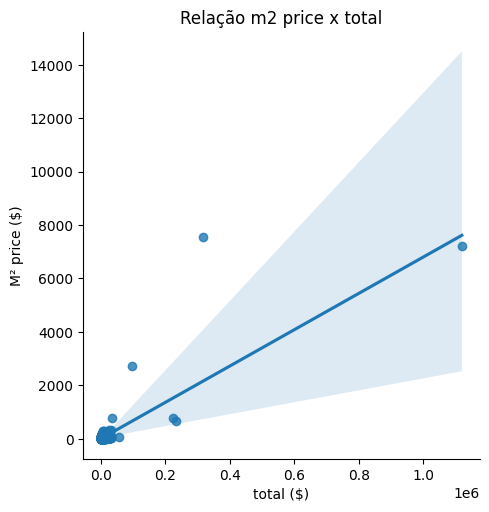

In [51]:
sns.lmplot(x = 'total' , y= 'm2_price', data = df2)
plt.xlabel('total ($)')
plt.ylabel('M² price ($)')
plt.title('Relação m2 price x total')
plt.show()

###Insights

Pelo que podemos ver, o preço do M² não interfere tanto no valor total do aluguel, já que tem uma relação não é tão forte.

#Respondendo a pergunta: **"Quais os imóveis com melhor custo x benefício*?**"

(melhor custo x benefício = area maior que a média e preço menor que a média)

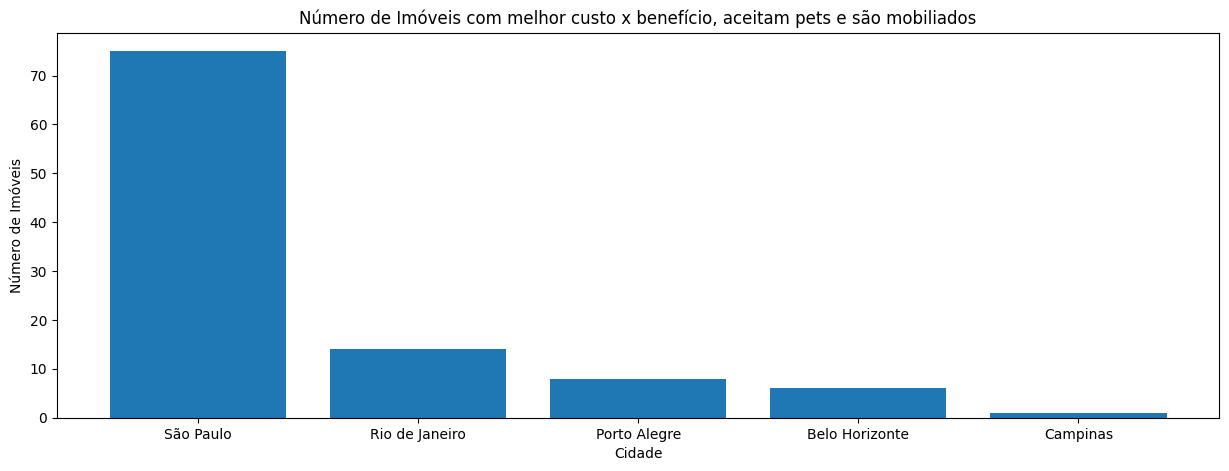

In [52]:
city2 = ['Belo Horizonte', 'Porto Alegre', 'Campinas', 'Rio de Janeiro', 'São Paulo']
result1 = []

for cidade in city2:
  acharcidade = df2.query(f'city == "{cidade}"')
  achararea = acharcidade['area'].mean()
  achartotal = acharcidade['total'].mean()
  resultado = acharcidade.query(f'area > {achararea} and total < {achartotal} and furnished == True and accepts_pets == True')
  result1.append(resultado)

resultado_final = pd.concat(result1)
resultado_final

result_count = resultado_final.groupby('city').size().sort_values(ascending=False)

plt.figure(figsize=(15, 5))
plt.bar(result_count.index, result_count.values)
plt.xlabel('Cidade')
plt.ylabel('Número de Imóveis')
plt.title('Número de Imóveis com melhor custo x benefício, aceitam pets e são mobiliados')
plt.show()

In [53]:
#Lista total dos imóveis com melhor custo x benefício, aceitam pets e são mobiliados
resultado_final.query('city == "Campinas"')

,city,area,rooms,bathroom,parking_spaces,floor,accepts_pets,furnished,hoa,rent_amount,property_tax,fire_insurance,total,m2_price
1185,Campinas,151,2,2,1,8,True,True,900,2000,262,26,3188,21.112583


In [54]:
result_count

city
São Paulo         75
Rio de Janeiro    14
Porto Alegre       8
Belo Horizonte     6
Campinas           1
dtype: int64